![Keras](keras-logo-small-wb.png)
# Keras Tutorial
by Ian J. Watson, University of Seoul

ian.james.watson@cern.ch


## Installing Jupyter

You can install jupyter with

`pip install jupyter`

then start by running

`jupyter notebook`

then you can follow along in the browser interface that opens up.

For more information, see e.g. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/

## This notebook

This notebook should run top to bottom as is. It pulls any required
datasets using the helpful functions that keras provides. With python
and pip installed, you can pull the dependencies by pip installing (you 
might need to add `--user` to the end of the command lines):

```
pip install matplotlib
pip install keras
pip install tensorflow # Pulls in the CPU version of tensorflow
pip install seaborn # For downloading viewing the iris dataset
pip install scikit-learn
pip install h5py
```

This can be done inside jupyter. A `!` before a line tells jupyter to
treat the line as a shell command

### Resources:

Keras documentation:
http://keras.io/

Large repository of various tutorials, examples, and applications
curated by the original author of Keras.
https://github.com/fchollet/keras-resources

Another tutorial presentation:
https://uwaterloo.ca/data-science/sites/ca.data-science/files/uploads/files/keras_tutorial.pdf


## Keras

- Deep learning framework built by Google engineer François Chollet
- High-level interface built allowing Theano or Tensorflow as a backend
- Library written in python, user-friendly interface
- Easy to get started building networks
- Highly modular and easily expandable
  - Can drop down into the underlying library when complex/bespoke operations
    are needed
- Quickly build and train serious models

## Installation

`pip install keras`

- Installs keras with Theano
- To use theano, need to setup theano in `~/.keras/keras.json`, e.g.

```
{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_last", 
    "backend": "theano" 
}
```

- For tensorflow `pip install tensorflow`
- Installs CPU version of tensorflow, change "backend" to "tensorflow" in JSON
  - For GPU, can be as simple as "pip install tensorflow-gpu" or may
    need to build yourself, dependending on OS/GPU combo


In [5]:
!pip2 install h5py

    100% |################################| 4.7MB 281kB/s eta 0:00:01


In [1]:
%matplotlib inline

# import pydot
import h5py
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, Reshape, UpSampling2D, BatchNormalization, MaxPooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cross_validation as scv
import sklearn
import numpy as np

Using TensorFlow backend.
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# The iris dataset and a basic network with Keras

- The iris dataset is a classic classification task, first studied by
  Fisher in 1936. 
- The goal is, given features measured from a particular
  iris, classify it into one of three species
  - Iris setosa, virginica, versicolor. 
- The variables are: Sepal width and length, petal width and length (all in cm).

![Iris variables](iris_petal_sepal.png)


We begin by loading the iris dataset, helpfully available from the
seaborn pacakge, which also lets us create plots showing the
correlations between the variables.

In [2]:
iris = sns.load_dataset("iris")
iris.head()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Lets view the basic variables we have. Setosa (blue) looks easily separable by the petal length and width, but versicolor and virginica are a little tricky.

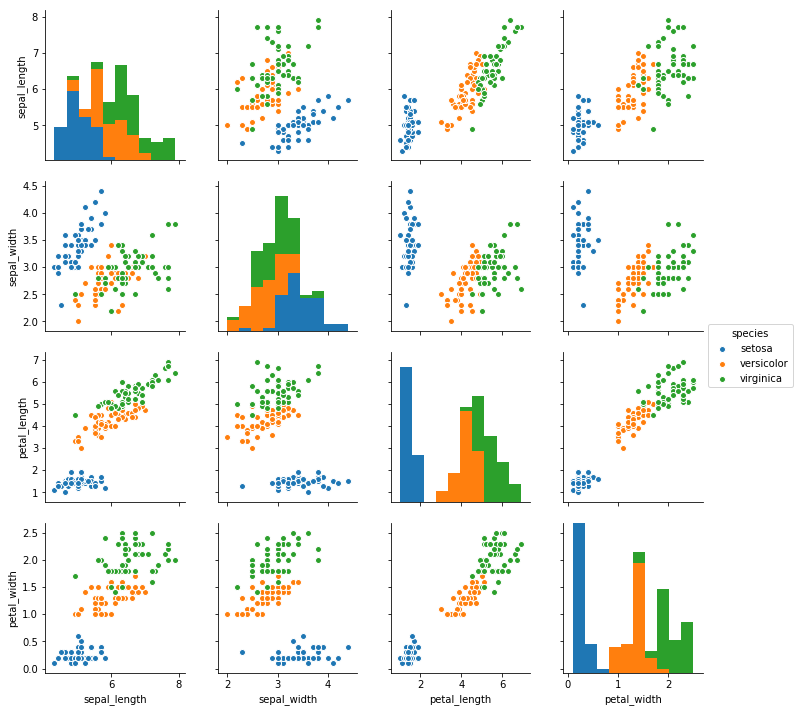

In [3]:
plot = sns.pairplot(iris, hue="species")
plot.savefig('iris.png')

##  A Keras Network

In order to classify the irises, we'll build a simple network in Keras.

- The basic network type in Keras is the Sequential model. 
- The Sequential model builds a neural network by stacking layers 
  - Keras also has a Graph model that allows arbitrary connections
- It builds up like lego, adding one layer on top of another and 
  connecting between the layers
  - Keras comes with a menagerie of pre-built layers for you to use.
- Interface to/from the model with numpy arrays

![Neural network](nn-1a.png)

- Our model will be a simple NN with a single hidden layer before the output
- We start by building a Sequential model and add a Dense (fully-connected) layer, with sigmoid activation
- Dense: standard layer where all inputs $\hat{x}$ connect to all outputs $\hat{y}$: $\hat{y} = W\hat{x} + \hat{b}$
  - `keras.layers.Dense(output_dim)`
  - Can also set the initalization, add an activation layer inline, add regularizers inline, etc.
- Activation: essentially acts as a switch for a given node, turns output on/off based on threshold
  - `keras.layers.Activation(type)`
    - Where type might be:
  - `'sigmoid`: $f(x) = \frac{1}{1 + e^{-x}}$
  - `'tanh`: $f(x) = \tanh{x} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
  - `'relu`: $f(x) = \mathrm{max}(0, x)$, 'rectified linear unit'
  - `'softplus`: $f(x) =  \ln{(1 + e^x)}$, smooth approx. to `'relu`
  - `'softmax`: $f_k(x) = \frac{e^{-x_k}}{\sum_i e^{-x_i}}$ for the $k$'th output, as last layer of categorical dsitribution, represents a probability distribution over the outputs

In [4]:
# Build a model
model = Sequential()

model.add(Dense(128, input_shape=(4,)))
model.add(Activation('sigmoid'))
# model.add(Dense(128))
# model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Notice that we build the model by `add`ing and keras takes care of the
details of input and output sizes of the layer when it can. We than
pass through a Dense layer of output size 3 and a softmax
activation. This will output the network probability for each of the
potential iris classes as a numpy array `(nsamples, (` $p_{setosa}$, $p_{virginica}$, $p_{versicolor}$ `))`.

We `compile` the model with an optimizer and a loss function to
minimize which will allow it to be trained on labelled data, and we
can tell the model to evaluate auxilliary metrics, such as the
accuracy of the model. Keras takes care of automatically calculating
derivates through the network and running the backpropagation
algorithm to update the model parameter. We can also pass the
functions directly to tune the hyperparameters, e.g.:
```model.compile(loss=keras.losses.mean_squared_error,
optimizer=keras.optimizers.SGD(lr=0.0005, momentum=0.9,
nesterov=True))```

Here we used the adam optimizer which automatically updates the step
sizes used for parameter optimization, with a categorical
cross-entropy loss, which measures $-\sum_{i} t_i\log{p_i}$ where
$t_i$ is 1 for the true label and $p_i$ is the probability of the
$i$th label assigned by the model. As the model assigns higher
probability to the correct label, the cross-entropy goes to 0.

Other options to consider:
- Activation: sigmoid, softmax, linear, tanh, relu, ...
- Optimizer: SGD, RMSprop, Adagrad, Adadelta, Adam, ...
- Loss: categorical_crossentropy, binary_crossentropy, mean_squared_error, ...

ReLU|sigmoid|tanh|softplus
-|-
![ReLU](code/relu.png) | ![sigmoid](code/sigmoid.png) | ![t](code/tanh.png) | ![softplus](code/softplus.png)


In [6]:
# If pydot is installed we can output a picture of the network
# keras.utils.plot_model(model, to_file='iris_model.png')

![model](iris_model.png)

Now we fit to the training data. We can set the number of epochs
(number of training passes through the complete dataset), batch sizes
(number of datapoints to consider together when updating the network),
and verbosity. We pass through the input data as a numpy array
(nsamples, 4) and the output (nsamples, 3) where for each sample one
of the positions is 1, corresponding to the correct class. We use the
LabelBinarizer to help us transform the raw species information (which
labels classes setosa, virginica, versicolor) to the expected format
(which is (1, 0, 0), (0, 1, 0), (0, 0, 1)).

We fit the model to a labelled dataset simply by calling `fit` with
the dataset `train_X` and the true labels `train_y`.

In [12]:
variables = iris.values[:, :4]
species = iris.values[:, 4]

b = sklearn.preprocessing.LabelBinarizer()
species_enc = b.fit_transform(species)

# we are simply passing numpy arrays of the data
print variables[0], species[0], species_enc[0]

train_X, test_X, train_y, test_y = scv.train_test_split(variables, species_enc, train_size=0.8, random_state=0)

model.fit(train_X, train_y, epochs=15, batch_size=1, verbose=1)

[5.1 3.5 1.4 0.2] setosa [1 0 0]
Epoch 1/15
120/120 [==============================] - 0s - loss: 0.0966 - acc: 0.9667     
Epoch 2/15
120/120 [==============================] - 0s - loss: 0.0902 - acc: 0.9750     
Epoch 3/15
120/120 [==============================] - 0s - loss: 0.0918 - acc: 0.9833     
Epoch 4/15
120/120 [==============================] - 0s - loss: 0.0919 - acc: 0.9750     
Epoch 5/15
120/120 [==============================] - 0s - loss: 0.0996 - acc: 0.9667     
Epoch 6/15
120/120 [==============================] - 0s - loss: 0.0881 - acc: 0.9750     
Epoch 7/15
120/120 [==============================] - 0s - loss: 0.0845 - acc: 0.9583     
Epoch 8/15
120/120 [==============================] - 0s - loss: 0.1003 - acc: 0.9583     
Epoch 9/15
120/120 [==============================] - 0s - loss: 0.0819 - acc: 0.9750      
Epoch 10/15
120/120 [==============================] - 0s - loss: 0.0880 - acc: 0.9583     
Epoch 11/15
120/120 [==============================] - 

After running the model, we can `evaluate` how well it works on the
labelled test data we kept aside for overfitting evaluation purposes.

In [10]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print("Loss={:.2f}\nAccuracy = {:.2f}".format(loss, accuracy))

Loss=0.11
Accuracy = 0.97


In [ ]:
Or simply ask the model to `predict` some unlablled data

In [13]:
pred_y = model.predict(test_X)
test_y[:10], pred_y[:10], len(test_y), len(test_X)

(array([[0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]]),
 array([[  9.14478626e-09,   6.44288119e-03,   9.93557155e-01],
        [  1.09449355e-03,   9.96685088e-01,   2.22038059e-03],
        [  9.99800265e-01,   1.99748174e-04,   5.33562518e-16],
        [  3.05008996e-08,   1.53383622e-02,   9.84661639e-01],
        [  9.98722374e-01,   1.27757352e-03,   3.03475405e-14],
        [  9.62891211e-10,   1.44368445e-03,   9.98556316e-01],
        [  9.99066532e-01,   9.33445350e-04,   1.60832346e-14],
        [  2.79232336e-04,   9.59775329e-01,   3.99454497e-02],
        [  1.56025606e-04,   9.37432587e-01,   6.24113604e-02],
        [  1.60889025e-03,   9.95693266e-01,   2.69778073e-03]], dtype=float32),
 30,
 30)

# MNIST digit recognition and Convolutional Networks

- Another, more recent, classic classification task. 
- Given a 28x28 image of a handwritten digit, can you train a classifier to recognize the
  numbers from 0 to 9?

Keras has the ability to download the dataset and parse it into numpy
arrays. We use the `LabelBinarizer` from `sklearn` to transform 

```0, 1, 2, 3,...``` 

into 

```[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], ...```

which is a from again suitable for using a
categorical_crossentropy loss function in Keras.

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
print(y_train[:5])
b = sklearn.preprocessing.LabelBinarizer()
y_train_enc = b.fit_transform(y_train)
y_test_enc = b.fit_transform(y_test)
y_train_enc[:5]

[5 0 4 1 9]


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

(60000, 28, 28) (60000, 10)


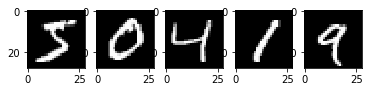

In [17]:
print x_train.shape, y_train_enc.shape
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')

- We can start by simply trying a basic neural network as before. 
- `Flatten` takes the 2D input and concatenates the rows together to a 1D form suitable for passing to a `Dense` layer.

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train_enc, epochs=3, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 6s - loss: 0.5453 - acc: 0.8529     
Epoch 2/3
60000/60000 [==============================] - 6s - loss: 0.3478 - acc: 0.8946     
Epoch 3/3
60000/60000 [==============================] - 6s - loss: 0.3113 - acc: 0.9051     


In [20]:
loss, accuracy = model.evaluate(x_test, y_test_enc, verbose=0)
print("Loss={:.2f}\nAccuracy = {:.2f}".format(loss, accuracy))

Loss=0.31
Accuracy = 0.90


## A Convolutional Network

![Convolutional layer](convolve.png)

- One of the great advances in image classification in recent times is the development of the convolutional layer. 
- We have some filter kernel `K` of size `n x m` which we apply to every `n x m` cell on the original image to create a new filtered image. 
- It has been seen that applying these in multiple layers of a network can build up multiple levels of abstraction to classify higher-level features.

![Many layers](NN_conv.png)

Reference: http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

- The Conv2D convolution layer in keras requires passing a numpy array of `width x height x channels` where channels might represent the red, green and blue channels of an image
- We have black and white images so we'll just reshape it into the required form with
  a single channel. 
- We plot the image just check show the shaping has been performed correctly.

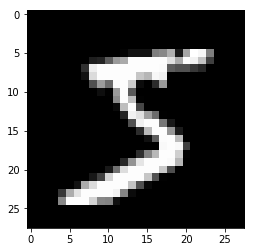

In [21]:
x_train_dense = x_train.reshape((len(x_train), 28,28,1))
x_test_dense = x_test.reshape((len(x_test), 28,28,1))

plt.imshow(x_train_dense[0,:,:,0], cmap="gray")

- Now, lets create a model with a convolution layer `Conv2D`. 
- Generally, these will be stacked on top of each other with MaxPooling layers and learn
 edge detection at lower layers and higher level feature extraction in
 subsequent layers.
- But just to show how to use them in keras, we'll
 just create one convolution layer with 32 fitlers, then flatten it
 into a 1D array and pass it into a Dense hidden layer before the
 output.
- We can set the kernel_size (`m x n` size of the filter), and the number of filters used

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

And train the model. This is already starting to get to the point where a GPU would be extremely helpful!

In [23]:
model.fit(x_train_dense, y_train_enc, epochs=4, verbose=1)

Epoch 1/4
60000/60000 [==============================] - 112s - loss: 0.4243 - acc: 0.8924   
Epoch 2/4
60000/60000 [==============================] - 114s - loss: 0.1477 - acc: 0.9569   
Epoch 3/4
60000/60000 [==============================] - 115s - loss: 0.1177 - acc: 0.9659   
Epoch 4/4
60000/60000 [==============================] - 116s - loss: 0.0982 - acc: 0.9710   


In [19]:
loss, accuracy = model.evaluate(x_test_dense, y_test_enc, verbose=0)
print("Loss={:.3f}\nAccuracy = {:.3f}".format(loss, accuracy))

Loss=0.108
Accuracy = 0.968


# A convolution GAN

This trains two adverserial networks, one trying to create images
equivalent to the MNIST dataset, the other trying to label the images
as either from the dataset or generated by the opposing network.

References:
- For more on GANs and their uses: https://arxiv.org/pdf/1701.00160.pdf
- Code based on: https://github.com/jacobgil/keras-dcgan
- Some tricks for training GANs https://github.com/soumith/ganhacks

![GAN overview](Gan.png)

We start with the image generation network, which is essentially a
image classifier in reverse. The top layer is for high-level feature
inputs which we'll randomly set during the training. We
then pass through Dense layers and then reshape into a `7 x 7 x channels`
image-style layer. We upsample and pass through convolutional filters
(which should here be adding features rather than finding features as
in the image classifier) until the last layer which outputs a `28x28x1`
image as expected of an MNIST greyscale image.

In [33]:
nfeatures = 100

generate = Sequential()
generate.add(Dense(1024, input_dim=nfeatures))
generate.add(Activation('tanh'))
generate.add(Dense(128*7*7))
generate.add(BatchNormalization())
generate.add(Activation('tanh'))
generate.add(Reshape((7, 7, 128)))
generate.add(UpSampling2D(size=(2,2)))
generate.add(Conv2D(64, (5,5), padding='same'))
generate.add(Activation('tanh'))
generate.add(UpSampling2D(size=(2,2)))
generate.add(Conv2D(1, (5, 5), padding='same'))
generate.add(Activation('sigmoid'))
generate.compile(loss="binary_crossentropy", optimizer="SGD")

Now, just to check everythings put together properly, randomly pass
some data through the network and check we get image outputs as
expected.

((28, 28, 1), 0.49522883)

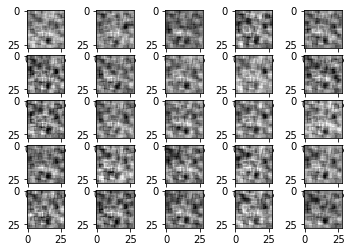

In [34]:
nim = 25
pred = generate.predict(np.random.uniform(0, 1, (nim,nfeatures)))

for i in xrange(nim):
    plt.subplot(np.sqrt(nim),np.sqrt(nim),i+1)
    plt.imshow(pred[i,:,:,0], cmap='gray')
    
pred[0].shape, np.average(pred[0])

Next, we create the discriminating network. As for classification, we
have a convolutional layer attached to Dense layers with a single
sigmoid output, with 0 representing a generated image, and 1 a real
MNIST dataset image.

In [35]:
discr = Sequential()
discr.add(Conv2D(64, (5,5), input_shape=(28,28,1), padding='same'))
discr.add(Activation('tanh'))
discr.add(MaxPooling2D((2,2)))
discr.add(Conv2D(128, (5,5)))
discr.add(Activation('tanh'))
discr.add(MaxPooling2D((2,2)))
discr.add(Dropout(0.5))
discr.add(Flatten())
discr.add(Dense(1024))
discr.add(Activation('tanh'))
discr.add(Dense(1))
discr.add(Activation('sigmoid'))
discr.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.0005, momentum=0.9, nesterov=True))

Test the network with a few MNIST images and some random images. Since
the network isn't trained we don't yet expect any differences in the
output.

In [36]:
x_prepred = np.concatenate([x_train[:5,:,:].reshape(5,28,28,1) / 256., 
                            np.random.uniform(0, 1, (5, 28, 28, 1))], axis=0)
discr.predict(x_prepred)

array([[ 0.48355624],
       [ 0.49296808],
       [ 0.49187601],
       [ 0.50517887],
       [ 0.51067108],
       [ 0.51988107],
       [ 0.50302899],
       [ 0.51929015],
       [ 0.52268857],
       [ 0.51356256]], dtype=float32)

Now we set up a network which will be used to train the generation
network. Keras allows us to simply add the models we just created
together into a Sequential like they were ordinary layers. So, we feed
the generator output into the discriminator input and set up an
optimizer which will try to drive the generator to produce MNIST-like
images (i.e. to fool the discriminator). Keras allows us to turn layer
training on and off through the "trainable" variable attached to a
layer, so when we train the generator we can easily turn training for
the discriminator off.

In [37]:
gen_discr = Sequential()
gen_discr.add(generate)
discr.trainable = False
gen_discr.add(discr)
gen_discr.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.0005, momentum=0.9, nesterov=True),
                  # optimizer='adam',
                  metrics=['accuracy'])
discr.trainable = True

And finally, we have the actual training. Here, we setup the batches
ourselves and alternate between training the discriminator and
generator. We start by taking a batch of MNIST images (labeled 1), and
generator images (labeled 0) and run a training batch on the
discriminator network. Then, we turn off training off the
discriminator and run training on the generator+discriminator network
with random high-level feature inputs to the generator. We try to
drive all the outputs to 1, i.e. train the generator to more
MNIST-like images (as according to the discriminator network).

In [24]:
batch_size = 100
n_epochs = 10
print_every_nth_epoch = 50
x_tru_all = x_train.reshape(len(x_train), 28, 28, 1) / 256.

zeros = np.array([0]*batch_size)
ones = np.array([1]*batch_size)
oneszeros = np.array([1]*batch_size + [0]*batch_size)

losses_d = []
losses_g = []
for epoch in xrange(n_epochs):
    print "Epoch", epoch
    discr.save(os.getenv("HOME")+"/discr-"+str(epoch))
    generate.save(os.getenv("HOME")+"/generate-"+str(epoch))
    for i in xrange(0, len(x_train), batch_size):
        x_gen = generate.predict(np.random.uniform(0, 1, (batch_size, nfeatures)))
        x_tru = x_tru_all[i:i+batch_size]
        discr.trainable=True
        loss_d = discr.train_on_batch(np.concatenate([x_tru, x_gen], axis=0), oneszeros)
        discr.trainable=False
        loss_g = gen_discr.train_on_batch(np.random.uniform(0, 1, (batch_size, nfeatures)), ones)
        if i % (print_every_nth_epoch*batch_size) == 0:
            print i / batch_size, "discr", loss_d, "--", "gen", loss_g[0], "( acc.", loss_g[1], ")"
        losses_g.append(loss_g)
        losses_d.append(loss_d)


Epoch 0


NameError: name 'discr' is not defined

After running the training, we can see what the output of the
generator network looks like. If you run the training step a couple of
times (which will take a long time on the CPU), it should begin to
look like handwritten numbers!

0.372346 0.347832 0.341593 0.350618 0.350911 0.346069 0.359488 0.348753 0.343799 0.361394 0.357993 0.353297 0.374008 0.344455 0.364969 0.372125


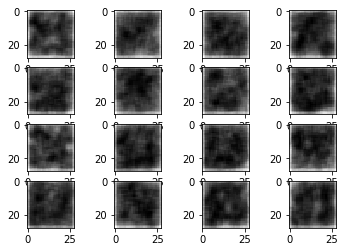

In [32]:
n = 4
for x in xrange(n):
    for y in xrange(n):
        plt.subplot(n, n, x*n+y+1)
        pred = generate.predict(np.random.uniform(0,1,(1,nfeatures)))
        plt.imshow(pred[0,:,:,0], cmap='gray')
        print discr.predict(pred)[0][0],


In [ ]:
discr_m = keras.models.load_model(os.getenv("HOME")+"/discr-"+str(epoch))

Example Outputs after 3 epochs:

![EG1](3_0.png)
![EG2](3_380.png)

From the above github repo after many epochs and picking the nicest images

![nice](nice_generated_image.png)

# End

That's it for today, enjoy deep learning!